# **Real-Time Communication System Powered By AI For Specially Abled**

**Loading the Dataset & Image Data Generation**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\KAAD\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [9]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)


In [10]:
# Training Dataset
x_train=train_datagen.flow_from_directory(r'../DATA COLLECTION/training_set',target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory(r'../DATA COLLECTION/test_set',target_size=(64,64), class_mode='categorical',batch_size=900)


Found 15130 images belonging to 1 classes.
Found 2250 images belonging to 1 classes.


In [11]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  17
Len x-test :  3


In [12]:
# The Class Indices in Training Dataset
x_train.class_indices

{'training_set': 0}

**Model Creation**

In [13]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [14]:
# Creating Model
model=Sequential()

In [15]:
# Adding Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())

In [18]:
# Adding Dense Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [19]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

C:\Users\KAAD\AppData\Local\Temp\ipykernel_3492\1042518445.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
17/17 [==============================] - 60s 3s/step - loss: 233.8465 - accuracy: 0.0050 - val_loss: 821.1965 - val_accuracy: 0.0000e+00
Epoch 2/10
17/17 [==============================] - 48s 3s/step - loss: 1806.5366 - accuracy: 0.0000e+00 - val_loss: 3430.9709 - val_accuracy: 1.0000
Epoch 3/10
17/17 [==============================] - 46s 3s/step - loss: 5591.5781 - accuracy: 0.2302 - val_loss: 10088.5967 - val_accuracy: 0.0000e+00
Epoch 4/10
17/17 [==============================] - 46s 3s/step - loss: 15875.0488 - accuracy: 0.1785 - val_loss: 24351.5723 - val_accuracy: 0.0000e+00
Epoch 5/10
17/17 [==============================] - 47s 3s/step - loss: 36624.0586 - accuracy: 0.1785 - val_loss: 51302.7852 - val_accuracy: 0.0000e+00
Epoch 6/10
17/17 [==============================] - 45s 3s/step - loss: 67785.0156 - accuracy: 0.1190 - val_loss: 94194.4297 - val_accuracy: 0.0000e+00
Epoch 7/10
17/17 [==============================] - 45s 3s/step - loss: 123454.8672 - accuracy:

**Saving the Model**

In [21]:
model.save('asl_model_84_54.h5')

**Testing the model**

In [22]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('asl_model_84_54.h5')
img=image.load_img(r'../DATA COLLECTION/test_set/test_set/D/2.png',
                   target_size=(64,64))

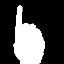

In [24]:
img

In [25]:
x=image.img_to_array(img)

In [26]:
x.ndim

3

In [27]:
x=np.expand_dims(x,axis=0)

In [28]:
x.ndim

4

In [29]:
pred=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 152ms/step


In [30]:
pred

array([5], dtype=int64)

In [31]:
index=['A','B','C','D','E','F','G','H','I']
print(index[pred[0]])

F


**OPEN CV**

In [32]:
import cv2

In [33]:
img=cv2.imread(r'../DATA COLLECTION/test_set/test_set/C/2.png',1)

In [34]:
img1=cv2.imread(r'../DATA COLLECTION/test_set/test_set/B/2.png',0)

In [35]:
print(img.shape)

(64, 64, 3)


In [36]:
import matplotlib.pyplot as plt




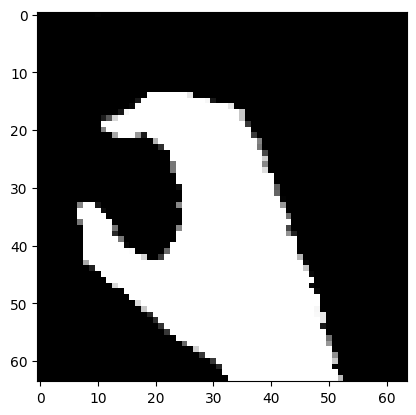

In [37]:
plt.imshow(img)